In [39]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import cv2
from scipy.stats import multivariate_normal

In [40]:
def media(I):
    ch = I.shape[2]
    med=np.zeros(ch,)
    for i in range(ch):
        med[i]=np.mean(I[:,:,i].ravel())
    return med

In [41]:
def mcov(I):
    nx,ny,ch = I.shape
    It=np.zeros((ch,nx*ny))
    for i in range(ch):
        It[i,:]=I[:,:,i].ravel()
    cova=np.cov(It)
    return cova

In [42]:
def mcovi(I,sx,sy):
    I=I.astype(np.float)
    nx,ny,ch = I.shape
    It=np.zeros((ch,len(sx)))
    for i in range(ch):
        It[i,:]=I[sx,sy,i].ravel()
    cova=np.cov(It)
    return cova

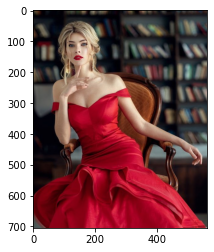

In [43]:
I = cv2.imread('imcolor3.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I,cmap='gray')
nx,ny,ch = I.shape

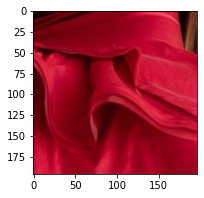

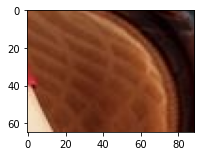

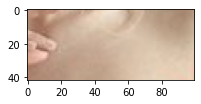

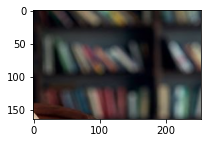

In [44]:
nm=5
phi=np.ones([nm,])/nm
med=np.zeros((nm,ch))
mc=np.zeros((nm,ch,ch))
for i in range(nm):
    roi=cv2.selectROI('sel',I)
    cv2.destroyWindow('sel')
    Iroi=I[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2]),:]
    fig=plt.figure(figsize = (3,3))
    plt.imshow(Iroi)
    med[i,:]=media(Iroi)
    mc[i,:,:]=mcov(Iroi)
# print(med)
# print(mc)

[[151.36012121   9.79589247  32.26792189]
 [113.53120138  59.5258427   35.6980121 ]
 [203.22547619 174.78214286 152.25714286]
 [ 58.47469392  55.90542755  55.39046081]]
___________
[[154.27644586  12.05998315  33.77312391]
 [ 99.13160038  60.72968696  45.71589576]
 [195.48509377 164.42332673 142.01615657]
 [ 51.99866213  48.18116042  48.48528209]]
___________
[[154.60446845  12.16719706  33.92257959]
 [110.9873798   69.1556783   52.10824891]
 [194.44982257 162.7677929  140.56451528]
 [ 47.69148881  44.77728882  45.69183521]]
___________
[[155.44757392  12.02886142  34.06192617]
 [114.23806655  71.46238203  54.9873065 ]
 [193.68867971 162.08571696 139.87447572]
 [ 44.84504314  42.55184408  43.8604125 ]]
___________
[[156.13814094  11.94171066  34.19549813]
 [112.76156895  72.00469752  56.64856607]
 [193.17886672 161.67207669 139.36441688]
 [ 43.02684134  40.93678781  42.58178088]]
___________
[[156.54303358  11.87343168  34.2637106 ]
 [110.50556433  72.51075209  58.15577657]
 [192.79652

<function matplotlib.pyplot.show(close=None, block=None)>

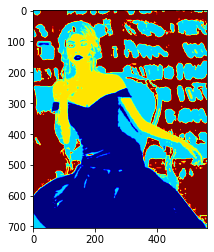

In [45]:
print(med)
print("___________")
lon=nx*ny
pdf=np.zeros((nm,lon))             
It=np.zeros((lon,ch))
for i in range(ch):
    It[:,i]=I[:,:,i].ravel()
It=It.astype(np.float)
pdf=np.zeros((lon,nm))

for ite in range(30):
    for model in range(nm):
        pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
    pdf=np.nan_to_num(pdf)
    pdft=np.sum(pdf,axis=1)
    gamma=pdf.T/pdft
    gamma=np.nan_to_num(gamma)
    assign=np.argmax(gamma,axis=0)
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        classt=np.where(assign==model)
        classt=classt[0]
        sx,sy=np.unravel_index(classt, (nx,ny))
        for i in range(ch):
            med[model,i]=np.dot(gamma[model,:],It[:,i])/suma
        mc[model,:,:]=mcovi(I,sx,sy)
    print(med)
    print("___________")
for model in range(nm):
    pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
pdf=np.nan_to_num(pdf)
pdft=np.sum(pdf,axis=1)
gamma=pdf.T/pdft
gamma=np.nan_to_num(gamma)
assign=np.argmax(gamma,axis=0)
assign=np.reshape(assign,(nx,ny))
plt.imshow(assign,cmap='jet')
plt.show

[155.98698235  11.96032826  34.17176057]


<function matplotlib.pyplot.show(close=None, block=None)>

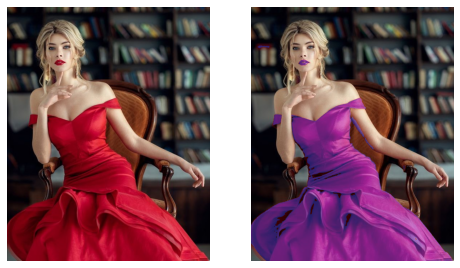

In [46]:
change=0
print(med[change,:])
assign=np.argmax(gamma,axis=0)
classt=np.where(assign==change)
classt=classt[0]
sx,sy=np.unravel_index(classt, (nx,ny))
It=np.copy(I)
for i in range(len(sx)):
    It[sx[i],sy[i],0]=It[sx[i],sy[i],0]-30
    It[sx[i],sy[i],1]=It[sx[i],sy[i],1]+30
    It[sx[i],sy[i],2]=It[sx[i],sy[i],2]+100
fig1=plt.figure(figsize = (8,8))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

b = fig1.add_subplot(1, 2, 2)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');
plt.imshow(It,cmap='gray')
plt.show
